<a href="https://colab.research.google.com/github/Bengyjr/Bengyhse/blob/main/Data_Analysis_on_Stock_Market_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Project - Stock Market Analysis

Time Series data is a series of data points indexed in time order. Time series data is everywhere, so manipulating them is important for any data analyst or data scientist.

In this notebook, we will discover and explore data from the stock market, particularly some technology stocks (Apple, Amazon, Google, and Microsoft). We will learn how to use yfinance to get stock information, and visualize different aspects of it using Seaborn and Matplotlib. we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Long Short Term Memory (LSTM) method!

We'll be answering the following questions along the way:

    1.) What was the change in price of the stock over time?
    2.) What was the daily return of the stock on average?
    3.) What was the moving average of the various stocks?
    4.) What was the correlation between different stocks'?
    5.) How much value do we put at risk by investing in a particular stock?
    6.) How can we attempt to predict future stock behavior? (Predicting the closing price stock price of APPLE inc using LSTM)

***

## Getting the Data
The first step is to get the data and load it to memory. We will get our stock data from the Yahoo Finance website. Yahoo Finance is a rich resource of financial market data and tools to find compelling investments. To get the data from Yahoo Finance, we will be using yfinance library which offers a threaded and Pythonic way to download market data from Yahoo. Check this article to learn more about yfinance: [Reliably download historical market data from with Python](https://aroussi.com/post/python-yahoo-finance)

# 1. What was the change in price of the stock overtime?

In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

In [3]:
!pip install -q yfinance

In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime

In [6]:
# The tech stocks we'll use for this analysis
tech_list = ['NVDA', 'SHEL', 'NKE', 'NEXT']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
  globals()[stock] = yf.download(stock, start, end)

company_list = [NVDA, SHEL, NKE, NEXT]
company_name = ['NVIDIA', 'SHEL', 'NIKE', 'NEXT']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [10]:
for company, com_name in zip(company_list, company_name):
  company['company_name'] = com_name

df = pd.concat(company_list, axis=0)
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-06-01,5.56,5.705,5.520,5.60,5.60,560800,NEXT
2023-06-02,5.76,5.840,5.675,5.75,5.75,545300,NEXT
2023-06-05,5.79,5.840,5.660,5.69,5.69,621100,NEXT
2023-06-06,5.60,5.635,5.310,5.58,5.58,1080400,NEXT
2023-06-07,5.64,5.880,5.600,5.78,5.78,799200,NEXT
2023-06-08,5.77,6.010,5.700,5.88,5.88,916900,NEXT
2023-06-09,6.00,6.225,5.780,6.14,6.14,1542100,NEXT
2023-06-12,6.15,6.150,5.425,5.59,5.59,1384800,NEXT
2023-06-13,5.61,5.620,4.970,5.13,5.13,1553200,NEXT


Reviewing the content of our data, we can see that the data is numeric and the date is the index of the data. Notice also that weekends are missing from the records.

**Quick note:** Using `globals()` is a sloppy way of setting the `DataFrame` names, but it's simple. Now we have our data, let's perform some basic data analysis and check our data.

## Descriptive Statistics about the Data
`.describe()` generates descriptive statistics. Descriptive statistics include those that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding `NaN` values.

Analyzes both numeric and object series, as well as `DataFrame` column sets of mixed data types. The output will vary depending on what is provided. Refer to the notes below for more detail.

In [11]:
# Summary Stats
NVDA.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,200.127539,204.477063,196.575753,200.963293,200.893939,5.112395e+07
std,69.999450,71.084093,69.248231,70.209530,70.231251,1.550000e+07
min,109.709999,117.349998,108.129997,112.269997,112.210609,1.679340e+07
25%,151.372501,154.624996,148.437496,151.572498,151.447311,4.100495e+07
50%,171.530006,177.919998,168.970001,173.480003,173.384735,4.827205e+07
75%,240.640003,247.374996,235.887497,245.562500,245.537090,5.666498e+07
max,408.239990,422.760010,405.519989,418.739899,418.739899,1.543911e+08


We have only 252 records in one year because weekends are not included in the data.

## Information About the Data
`.info()` method prints information about a DataFrame including the index `dtype` and columns, non-null values, and memory usage.

In [12]:
NVDA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2022-06-14 to 2023-06-14
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


## Closing Price

The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time.

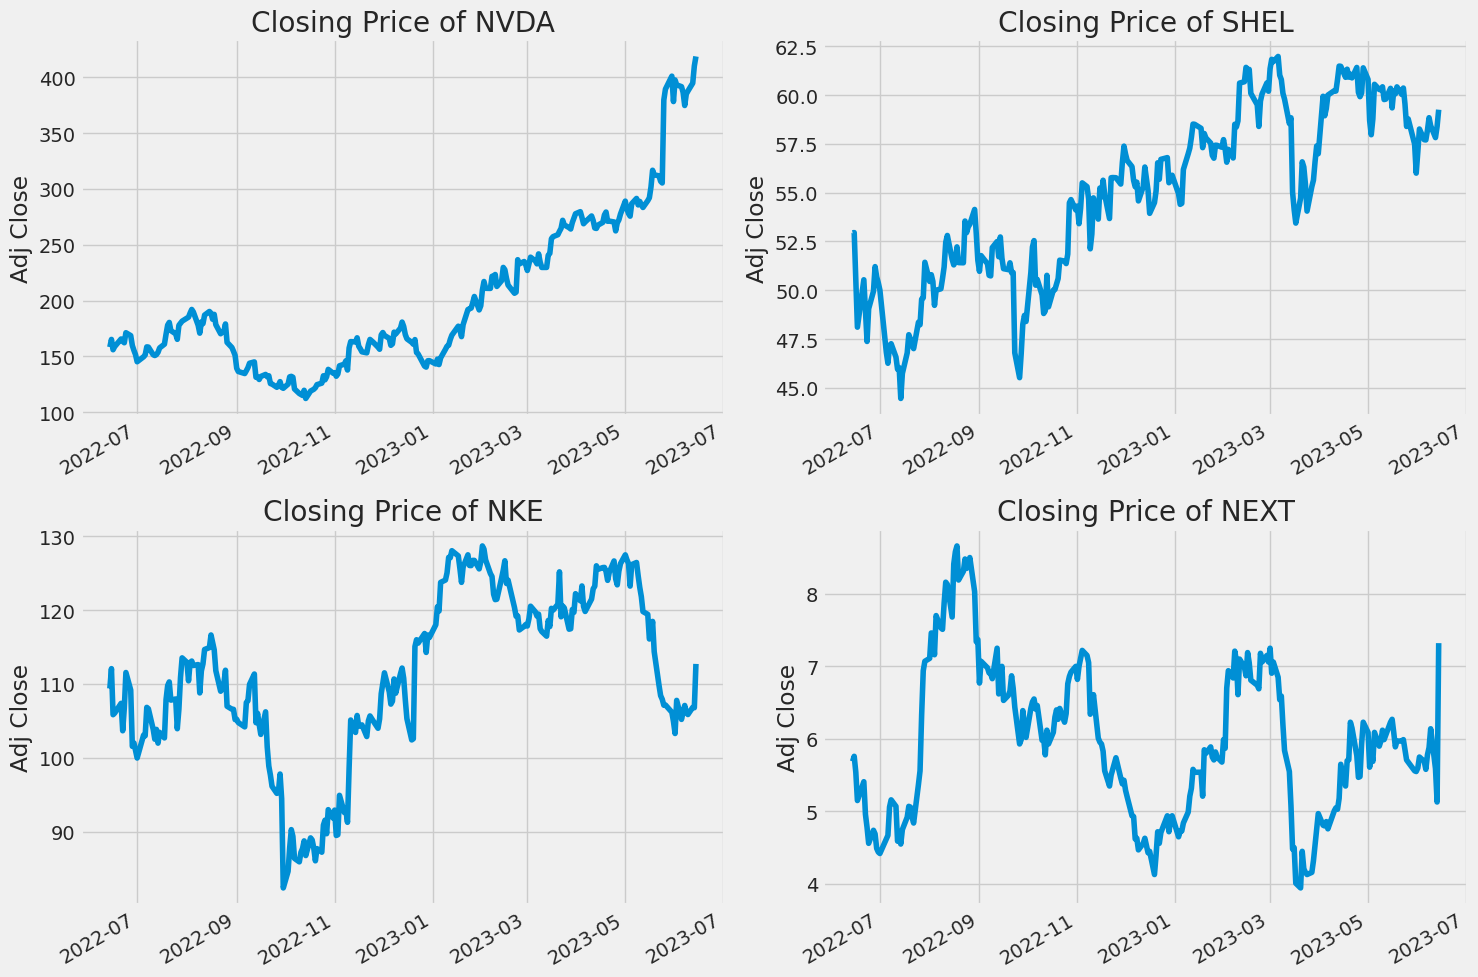

In [17]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
  plt.subplot(2, 2, i)
  company['Adj Close'].plot()
  plt.ylabel('Adj Close')
  plt.xlabel(None)
  plt.title(f'Closing Price of {tech_list[i - 1]}')

plt.tight_layout()

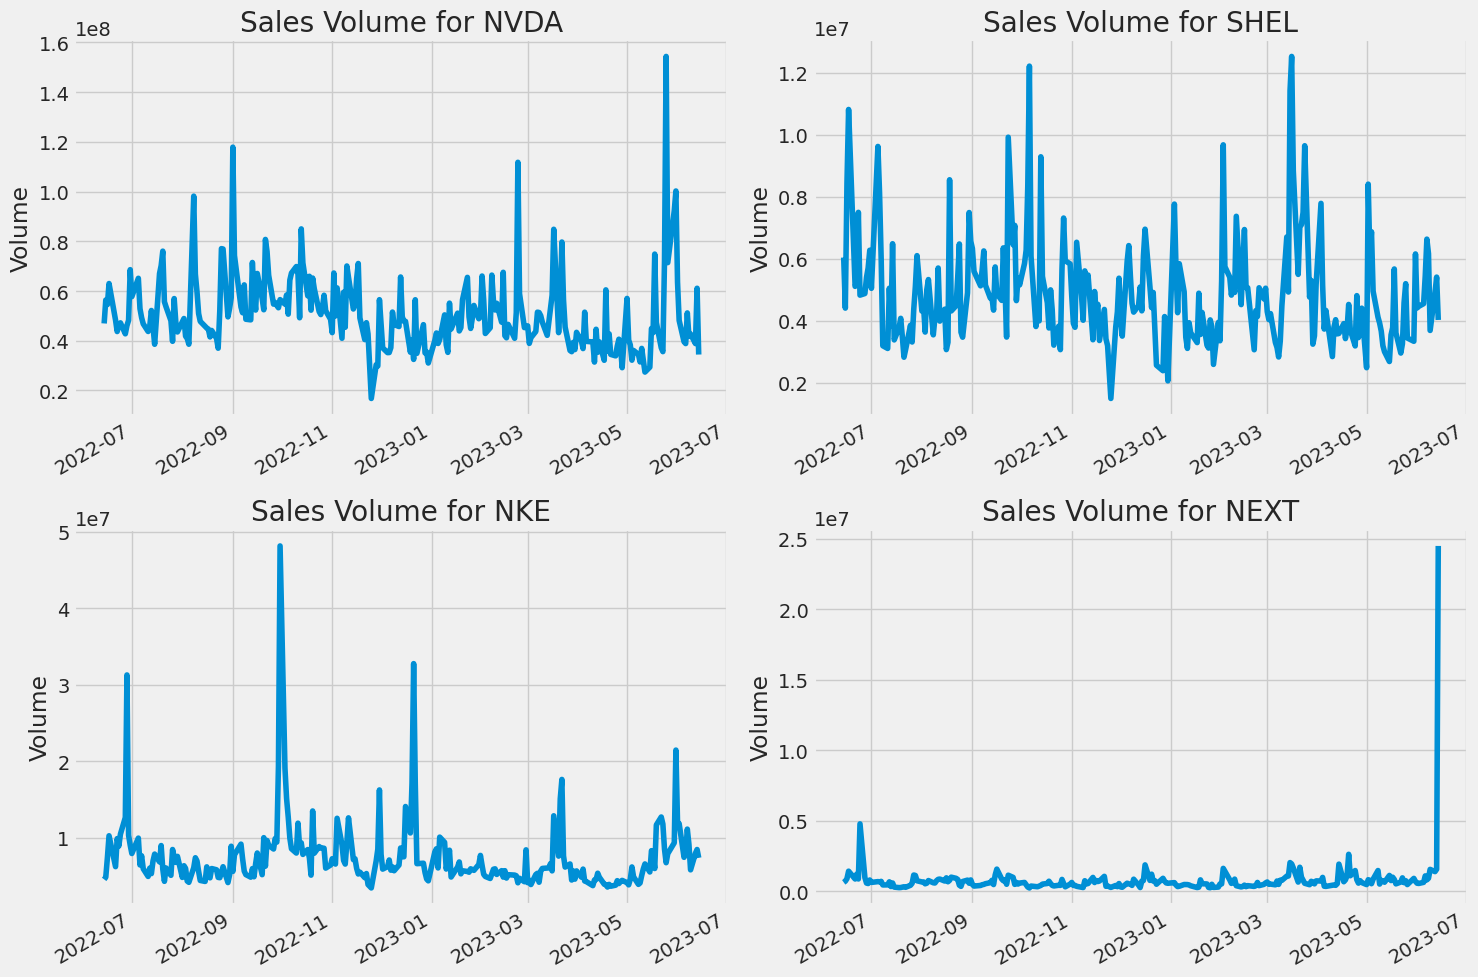

In [18]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()